# **Práctica 6: SVM**
José Luis Haro Díaz

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import plotly.express as px
import pandas as pd

In [60]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

#0 = maligno, 1 = benigno
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [63]:
X.describe()
y.value_counts()

,count
1,357
0,212


In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [68]:
for C_val in [0.1, 1.0]:
    model_linear = SVC(kernel='linear', C=C_val)
    model_linear.fit(X_train, y_train)
    y_pred = model_linear.predict(X_test)

    print(f"Resultados para C={C_val} (Lineal):")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Resultados para C=0.1 (Lineal):
[[41  2]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Resultados para C=1.0 (Lineal):
[[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [70]:
for C_val in [0.1, 1.0]:
    model_rbf = SVC(kernel='rbf', C=C_val)
    model_rbf.fit(X_train, y_train)
    y_pred = model_rbf.predict(X_test)

    print(f"Resultados para C={C_val} (RBF):")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Resultados para C=0.1 (RBF):
[[39  4]
 [ 2 69]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Resultados para C=1.0 (RBF):
[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [71]:
for kernel in ['linear', 'rbf']:
    for C_val in [0.1, 1.0]:
        model = SVC(kernel=kernel, C=C_val)
        scores = cross_val_score(model, X_scaled, y, cv=5)
        print(f"Kernel={kernel}, C={C_val} => Accuracy promedio (5-fold): {scores.mean():.4f}")

Kernel=linear, C=0.1 => Accuracy promedio (5-fold): 0.9754
Kernel=linear, C=1.0 => Accuracy promedio (5-fold): 0.9701
Kernel=rbf, C=0.1 => Accuracy promedio (5-fold): 0.9455
Kernel=rbf, C=1.0 => Accuracy promedio (5-fold): 0.9736


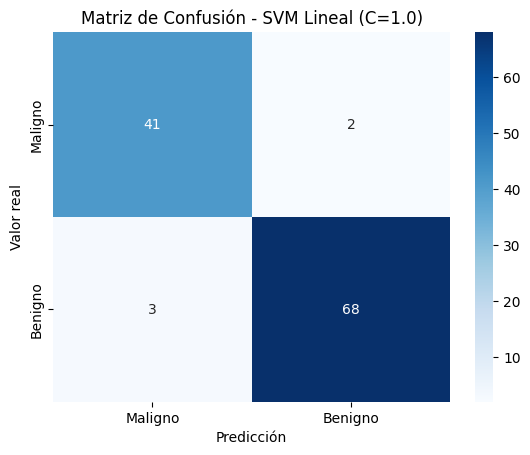

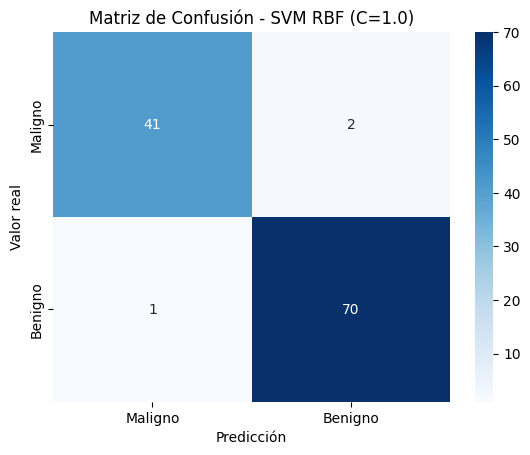

In [72]:
def plot_confusion_heatmap(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Maligno', 'Benigno'],
                yticklabels=['Maligno', 'Benigno'])
    plt.xlabel("Predicción")
    plt.ylabel("Valor real")
    plt.title(title)
    plt.show()

# SVM Lineal C=1.0
model_linear = SVC(kernel='linear', C=1.0)
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
plot_confusion_heatmap(y_test, y_pred_linear, "Matriz de Confusión - SVM Lineal (C=1.0)")

# SVM RBF C=1.0
model_rbf = SVC(kernel='rbf', C=1.0)
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)
plot_confusion_heatmap(y_test, y_pred_rbf, "Matriz de Confusión - SVM RBF (C=1.0)")

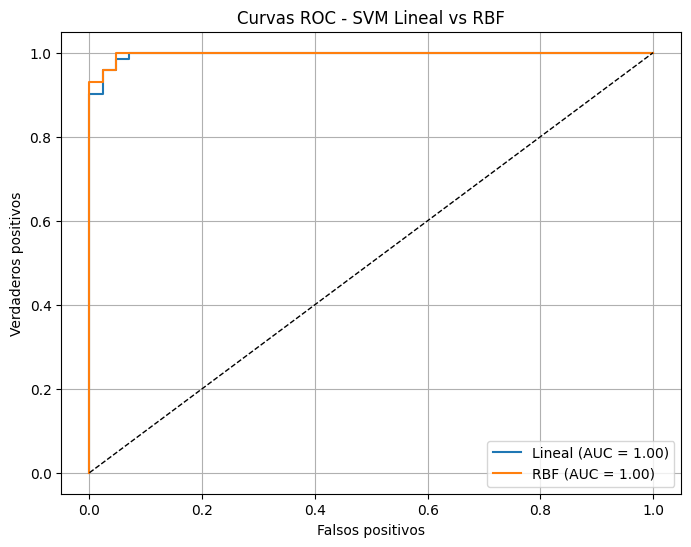

In [74]:
model_linear = SVC(kernel='linear', C=1.0, probability=True)
model_rbf = SVC(kernel='rbf', C=1.0, probability=True)

model_linear.fit(X_train, y_train)
model_rbf.fit(X_train, y_train)

y_proba_linear = model_linear.predict_proba(X_test)[:, 1]
y_proba_rbf = model_rbf.predict_proba(X_test)[:, 1]

fpr_lin, tpr_lin, _ = roc_curve(y_test, y_proba_linear)
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_proba_rbf)

roc_auc_lin = auc(fpr_lin, tpr_lin)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lin, tpr_lin, label=f"Lineal (AUC = {roc_auc_lin:.2f})")
plt.plot(fpr_rbf, tpr_rbf, label=f"RBF (AUC = {roc_auc_rbf:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curvas ROC - SVM Lineal vs RBF")
plt.legend()
plt.grid(True)
plt.show()

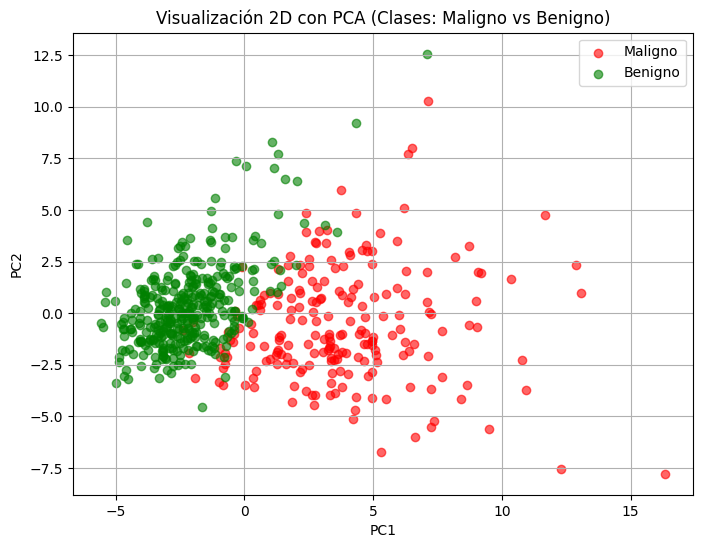

In [55]:
target_names = ['Maligno', 'Benigno']
colors = ['red', 'green']

plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(X_pca_2d[y == label, 0], X_pca_2d[y == label, 1], label=target_names[label], color=colors[label], alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualización 2D con PCA (Clases: Maligno vs Benigno)")
plt.legend()
plt.grid(True)
plt.show()

In [75]:
pca_df = pd.DataFrame(X_pca_3d, columns=["PC1", "PC2", "PC3"])
pca_df['Diagnóstico'] = y.map({0: "Maligno", 1: "Benigno"})

fig = px.scatter_3d(
    pca_df, x="PC1", y="PC2", z="PC3",
    color="Diagnóstico",
    color_discrete_map={"Maligno": "red", "Benigno": "green"},
    opacity=0.7,
    title="Visualización 3D Interactiva del Dataset con PCA"
)

fig.show()